In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 0.75

In [ ]:
articles = []
labels = []

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
with open("/content/bbc-text.csv", "r") as file:
  reader = csv.reader(file, delimiter=",")
  next(reader)

  for row in reader:
    labels.append(row[0])
    article = row[1]

    for word in stop_words:
      token = " " + word + " "

      article = article.replace(token, " ")

    articles.append(article)

In [ ]:
articles[0]

'tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies

In [ ]:
labels[0]

'tech'

In [ ]:
len(articles)

2225

In [ ]:
train_size = int(len(articles) * training_size) # 4450 * 0.75 = around 3337/3338
train_size

1668

In [ ]:
remaining_portion = 1 - training_size

remaining_portion

0.25

In [ ]:
train_size = int(len(articles) * training_size)
remaining_size = len(articles) - train_size
val_size = remaining_size // 2
test_size = remaining_size - val_size

In [ ]:
val_size, test_size

(278, 279)

In [ ]:
train_labels = labels[0:train_size]
train_articles = articles[0:train_size]

val_labels = labels[train_size:(train_size + val_size)]
val_articles = articles[train_size:(train_size + val_size)]

test_labels = labels[(train_size + val_size):]
test_articles = articles[(train_size + val_size):]

In [ ]:
train_articles[0], val_articles[0], test_articles[0]

('tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

In [ ]:
train_labels[0], val_labels[0], test_labels[0]

('tech', 'sport', 'sport')

In [ ]:
print("train_size", train_size)
print("train_articles", len(train_articles))
print("train_labels", len(train_labels))
print("validation_articles", len(val_articles))
print("validation_labels", len(val_labels))
print("test_articles", len(test_articles))
print("test_labels", len(test_labels))

train_size 1668
train_articles 1668
train_labels 1668
validation_articles 278
validation_labels 278
test_articles 279
test_labels 279


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [ ]:
tokenizer.fit_on_texts(train_articles)

In [ ]:
tokenizer

In [ ]:
help(tokenizer)

Help on Tokenizer in module keras.src.legacy.preprocessing.text object:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |  
 |  DEPRECATED.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit_on_sequences(self, sequences)
 |  
 |  fit_on_texts(self, texts)
 |  
 |  get_config(self)
 |  
 |  sequences_to_matrix(self, sequences, mode='binary')
 |  
 |  sequences_to_texts(self, sequences)
 |  
 |  sequences_to_texts_generator(self, sequences)
 |  
 |  texts_to_matrix(self, texts, mode='binary')
 |  
 |  texts_to_sequences(self, texts)
 |  
 |  texts_to_sequences_generator(self, texts)
 |  
 |  to_json(self, **kwargs

In [ ]:
tokenizer.texts_to_sequences(["I love my dog"])

[[1, 603, 1, 1]]

In [ ]:
tokenizer.sequences_to_texts([[1, 623, 1, 1]])

['<OOV> talks <OOV> <OOV>']

In [ ]:
tokenizer.texts_to_sequences(test_articles)

[[1,
  666,
  1083,
  17,
  217,
  2040,
  813,
  1,
  666,
  1,
  4678,
  1546,
  4952,
  1950,
  2040,
  752,
  1679,
  2161,
  1044,
  2845,
  752,
  4609,
  1364,
  1,
  1318,
  1528,
  1751,
  2604,
  12,
  70,
  1,
  365,
  1,
  3046,
  2,
  3546,
  1679,
  666,
  187,
  266,
  606,
  1468,
  2604,
  1083,
  65,
  183,
  4452,
  677,
  42,
  1546,
  1415,
  4760,
  1,
  4965,
  1,
  3046,
  790,
  790,
  26,
  138,
  1,
  2556,
  3435,
  3359,
  647,
  1,
  881,
  1679,
  4610,
  243,
  23,
  35,
  677,
  1546,
  1559,
  1950,
  371,
  1974,
  1,
  838,
  1318,
  4202,
  4681,
  2878,
  1106,
  1737,
  1,
  217,
  2040,
  957,
  1,
  1689,
  4152,
  1106,
  56,
  1364,
  838,
  643,
  725,
  1,
  308,
  1260,
  711,
  2574,
  964,
  2600,
  3266,
  478,
  2121,
  838,
  643,
  1106,
  79,
  121,
  384,
  1,
  4679,
  2399,
  110,
  20,
  2574,
  1546,
  1950,
  54,
  285,
  511,
  752,
  764,
  4204,
  1528,
  2054,
  1364,
  838,
  1318,
  1,
  3168,
  3379,
  1390,
  2477,
  11

In [ ]:
tokenizer.word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'music': 24,
 'made': 25,
 'like': 26,
 'get': 27,
 'many': 28,
 'game': 29,
 'back': 30,
 'labour': 31,
 '000': 32,
 'three': 33,
 '1': 34,
 'bbc': 35,
 'next': 36,
 'well': 37,
 'take': 38,
 'number': 39,
 'way': 40,
 'set': 41,
 'added': 42,
 '2': 43,
 'market': 44,
 'may': 45,
 'company': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 '2004': 50,
 'party': 51,
 'good': 52,
 'much': 53,
 'still': 54,
 'going': 55,
 'games': 56,
 'work': 57,
 'show': 58,
 'win': 59,
 'think': 60,
 'england': 61,
 'second': 62,
 '6': 63,
 'million': 64,
 'go': 65,
 'since': 66,
 'play': 67,
 'firm': 68,
 'say': 69,
 'week': 70,
 'blair': 71,
 'top': 72,
 'public': 73,
 'part': 74,
 'want': 75,
 '3': 76,
 'mini

In [ ]:
"I" in tokenizer.word_index

False

In [ ]:
for article in train_articles:
  words = article.split()
  for word in words:
    if "I" in word:
      print(word)

In [ ]:
for article in test_articles:
  words = article.split()
  for word in words:
    if "I" in word:
      print(word)

In [ ]:
for article in val_articles:
  words = article.split()
  for word in words:
    if "I" in word:
      print(word)

In [ ]:
train_articles[0][:52]

'tv future hands viewers home theatre systems  plasma'

In [ ]:
first_article = train_articles[0]

first_52_chars = first_article[:52]

tokens = tokenizer.texts_to_sequences([first_52_chars])

print(tokens)

[[89, 164, 1108, 1091, 49, 999, 747, 1]]


In [ ]:
tokenizer.sequences_to_texts(tokens)

['tv future hands viewers home theatre systems <OOV>']

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
len(tokens[0])

8

In [ ]:
train_sequences[0][:len(tokens[0])]

[89, 164, 1108, 1091, 49, 999, 747, 1]

In [ ]:
tokenizer.sequences_to_texts([train_sequences[0][:len(tokens[0])]])

['tv future hands viewers home theatre systems <OOV>']

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(val_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_articles)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

In [ ]:
label_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [ ]:
label_tokenizer.texts_to_sequences(["business"])

[[2]]

In [ ]:
train_labels_sequences = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_labels_sequences = np.array(label_tokenizer.texts_to_sequences(val_labels))
test_labels_sequences = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(6, activation='softmax'))

In [ ]:
model

<Sequential name=sequential, built=False>

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [ ]:
epochs = 15

history = model.fit(train_padded, train_labels_sequences, epochs=epochs, validation_data=(validation_padded, validation_labels_sequences), verbose=2)

Epoch 1/15
53/53 - 8s - 154ms/step - accuracy: 0.2836 - loss: 1.6022 - val_accuracy: 0.4065 - val_loss: 1.4458
Epoch 2/15
53/53 - 1s - 15ms/step - accuracy: 0.5150 - loss: 1.2102 - val_accuracy: 0.6978 - val_loss: 1.0052
Epoch 3/15
53/53 - 1s - 24ms/step - accuracy: 0.7158 - loss: 0.7670 - val_accuracy: 0.6187 - val_loss: 0.8933
Epoch 4/15
53/53 - 1s - 24ms/step - accuracy: 0.8531 - loss: 0.4708 - val_accuracy: 0.9209 - val_loss: 0.3300
Epoch 5/15
53/53 - 1s - 15ms/step - accuracy: 0.9592 - loss: 0.1915 - val_accuracy: 0.9317 - val_loss: 0.3088
Epoch 6/15
53/53 - 1s - 15ms/step - accuracy: 0.9844 - loss: 0.1044 - val_accuracy: 0.9353 - val_loss: 0.2159
Epoch 7/15
53/53 - 2s - 30ms/step - accuracy: 0.9916 - loss: 0.0551 - val_accuracy: 0.9676 - val_loss: 0.1157
Epoch 8/15
53/53 - 1s - 21ms/step - accuracy: 0.9940 - loss: 0.0348 - val_accuracy: 0.9640 - val_loss: 0.1354
Epoch 9/15
53/53 - 1s - 18ms/step - accuracy: 0.9988 - loss: 0.0149 - val_accuracy: 0.9676 - val_loss: 0.1053
Epoch 10/

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

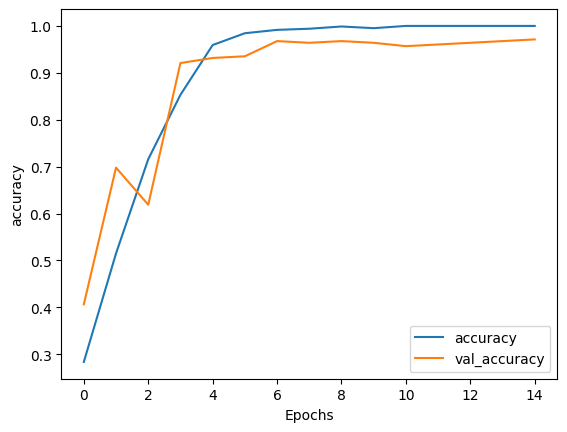

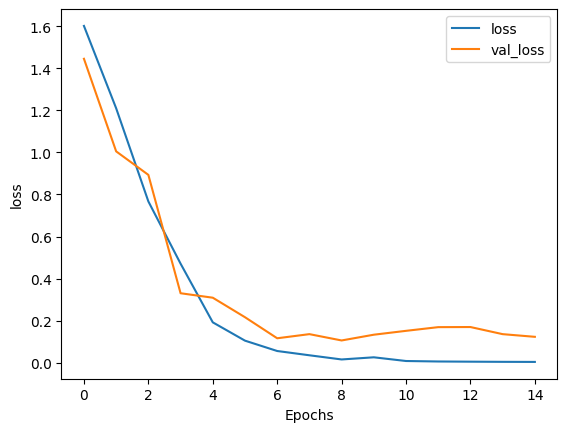

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
test_loss, test_acc = model.evaluate(test_padded, test_labels_sequences)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9717 - loss: 0.1172


In [ ]:
test_loss, test_acc

(0.1997387856245041, 0.9569892287254333)

In [ ]:
set(test_labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [ ]:
test_articles[120], test_labels[120], test_labels_sequences[120]

('blog reading explodes america americans becoming avid blog readers  32 million getting hooked 2004  according new research.  survey  conducted pew internet american life project  showed blog readership shot 58% last year. growth attributable political blogs written read us presidential campaign. despite explosive growth  60% online americans still never heard blogs  survey found. blogs  web logs  online spaces people publish thoughts  opinions spread news events words. companies google microsoft provide users tools publish blogs.  rise blogs spawned new desire immediate news information  six million americans using rss aggregators. rss aggregators downloaded pcs programmed subscribe feeds blogs  news sites websites. aggregators automatically compile latest information published online blogs news sites. reading blogs remains far popular writing  survey found. 7% 120 million us adults use internet created blog web-based diary. getting involved becoming popular though  12% saying posted

In [ ]:
test_article_120 = test_articles[120]

test_sequence_120 = tokenizer.texts_to_sequences([test_article_120])
test_padded_120 = pad_sequences(test_sequence_120, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model.predict(test_padded_120)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


array([[1.0446784e-04, 3.9998296e-04, 1.3230838e-03, 4.7092716e-04,
        9.9693620e-01, 7.6532498e-04]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_padded_120))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


4

In [ ]:
label_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [ ]:
label_tokenizer.word_index.keys()

dict_keys(['sport', 'business', 'politics', 'tech', 'entertainment'])

In [ ]:
list(label_tokenizer.word_index.keys())

['sport', 'business', 'politics', 'tech', 'entertainment']

In [ ]:
list(label_tokenizer.word_index.keys())[np.argmax(model.predict(test_padded_120)) - 1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'tech'

- The tokenizer starts counting from 1 for classes, but np.argmax() gives a zero-based index.
- This adjustment helps you map the predicted index back to the corresponding class label correctly.

In [ ]:
def predict_text(text, model):
  text_sequence = tokenizer.texts_to_sequences([text])
  text_padded = pad_sequences(text_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  prediction = model.predict(text_padded)
  highest_prob_index = np.argmax(prediction)

  labels = list(label_tokenizer.word_index.keys())
  predicted_label = labels[highest_prob_index - 1]

  return predicted_label

In [ ]:
predict_text(test_articles[140], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'business'

In [ ]:
test_labels[140]

'business'

In [ ]:
predict_text(test_articles[278], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'sport'

In [ ]:
test_labels[278]

'sport'

In [ ]:
model.save('my_model.keras')

In [ ]:
loaded_model = tf.keras.models.load_model('my_model.keras')

In [ ]:
predict_text(test_articles[212], loaded_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


'politics'

In [ ]:
test_labels[212]

'politics'

In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
  pickle.dump(tokenizer, f)

with open('label_tokenizer.pkl', 'wb') as f:
  pickle.dump(label_tokenizer, f)